In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Example HAWKS vs HEAT prediction for next game
#We can fetch team ids for game which we are going to predict 
#Ex {HAWKS : 101} {HEAT: 112}
team1_ID = 101
team2_ID = 112 
team1_Name = 'Hawks'
team2_Name ='Heat'

In [3]:
team_data_frame = pd.read_excel('past_record.xlsx',sheet_name='Teams')

team_data_frame.head()

maindf = pd.read_excel('past_record.xlsx',sheet_name='Schedules')

team_data_frame.head()

,tid,tname
0,101,Atlanta Hawks
1,102,Boston Celtics
2,103,Cleveland Cavaliers
3,104,New Orleans Pelicans
4,105,Chicago Bulls


In [4]:
def checkTotalwin(total_df, ID):
    
    for index, row in total_df.iterrows():
        if row['hlstid'] == ID and row['hlsscore'] > row['vlsscore']:
            total_df.loc[index, 'winner'] = True   
        else:
            total_df.loc[index, 'winner'] = False
            
def checkTotalVisitorWin(total_df, ID):
    
    for index, row in total_df.iterrows():
        if row['vlstid'] == ID and row['hlsscore'] < row['vlsscore']:
            total_df.loc[index, 'winner'] = True   

            
team1_total_df = maindf[(maindf['hlstid'] == team1_ID) | (maindf['vlstid'] == team1_ID)]
team1_total_df = team1_total_df.drop_duplicates(subset ='gid') 
team1TotalGame = len(team1_total_df)

checkTotalwin(team1_total_df, team1_ID)
checkTotalVisitorWin(team1_total_df, team1_ID)
team1_win_df = team1_total_df[team1_total_df['winner'] == True]
team1WinTot  = len(team1_win_df)

print("Total Game Played by "+team1_Name+" : ")
print(team1TotalGame)
print("Total Game win by "+team1_Name+" : ")
print(team1WinTot)

Total Game Played by Hawks : 
82
Total Game win by Hawks : 
29


In [5]:
team2_total_df = maindf[(maindf['hlstid'] == team2_ID) | (maindf['vlstid'] == team2_ID)]
team2_total_df = team2_total_df.drop_duplicates(subset ='gid') 
team2TotalGame = len(team2_total_df)

checkTotalwin(team2_total_df, team2_ID)
checkTotalVisitorWin(team2_total_df, team2_ID)
team2_win_df = team2_total_df[team2_total_df['winner'] == True]
team2WinTot  = len(team2_win_df)

print("Total Game Played by "+team2_Name+" : ")
print(team2TotalGame)
print("Total Game win by "+team2_Name+" : ")
print(team2WinTot)

Total Game Played by Heat : 
82
Total Game win by Heat : 
39


In [6]:
isHomeFirst = False
isVisitorFirst = False

def checkvswin(total_df, ID):
    
    for index, row in total_df.iterrows():
        if (row['hlstid'] == ID and row['hlsscore'] > row['vlsscore']):
            total_df.loc[index, 'winner'] = True   
        else:
            total_df.loc[index, 'winner'] = False
            
def checkvsVisitorWin(total_df, ID):
    
    for index, row in total_df.iterrows():
        if (row['vlstid'] == ID and row['vlsscore'] > row['hlsscore']):
            total_df.loc[index, 'winner'] = True
        else:
            total_df.loc[index, 'winner'] = False
            
def isFirstORSecond(vs_win_df, team1_ID):
        global isHomeFirst
        global isVisitorFirst
        if (vs_win_df['hlstid'].iloc[0] == team1_ID and vs_win_df['hlsscore'].iloc[0] > vs_win_df['vlsscore'].iloc[0] and not vs_win_df['winner'].iloc[0]):
            isHomeFirst = True
            isVisitorFirst = False
            print(isHomeFirst)
        elif vs_win_df['vlsscore'].iloc[0] > vs_win_df['hlsscore'].iloc[0] and not vs_win_df['winner'].iloc[0]:
            isVisitorFirst = True
            isHomeFirst = False
            print(isVisitorFirst)
            
total_vs_df = maindf[(maindf['hlstid'] == team1_ID) | (maindf['vlstid'] == team1_ID)]
total_vs_df = total_vs_df[(total_vs_df['hlstid'] == team2_ID) | (total_vs_df['vlstid'] == team2_ID)]
total_vs_df = total_vs_df.drop_duplicates(subset ='gid') 

totalVsGame = len(total_vs_df)

checkvswin(total_vs_df, team1_ID)
checkvsVisitorWin(total_vs_df, team1_ID)
vs_win_df = total_vs_df[total_vs_df['winner'] == False]
vsWinTot = len(vs_win_df)
isFirstORSecond(vs_win_df, team1_ID)

total_vs_df.head()

True


,gid,hlsscore,hlstid,vlsscore,vlstid,winner
8,1009,123,101,118,112,False
20,1021,113,112,115,101,True
38,1039,106,101,82,112,False
64,1065,114,112,113,101,False


In [7]:
percent = 100
tot_team1_percent = percent/team1TotalGame
tot_team1_percent = tot_team1_percent * team1WinTot

tot_team2_percent = percent/team2TotalGame
tot_team2_percent = tot_team2_percent *  team2WinTot

total_dict = {'Team':[team1_Name, team2_Name], 'Percent':[tot_team1_percent, tot_team2_percent]}
    
total_predict_df = pd.DataFrame(total_dict)

tot_vs_percent = percent/totalVsGame
tot_vs_team1_percent = tot_vs_percent * vsWinTot
tot_vs_team2_percent = percent - tot_vs_team1_percent

vs_dict = {}

if(isHomeFirst and not isVisitorFirst):
    vs_dict = {'Team':[team1_Name, team2_Name], 'Percent':[tot_vs_team1_percent, tot_vs_team2_percent]}
else:
    vs_dict = {'Team':[team1_Name, team2_Name], 'Percent':[tot_vs_team2_percent, tot_vs_team1_percent]}

vs_predict_df = pd.DataFrame(vs_dict)

***** Overall Prediction *****
------------------------------


,Team,Percent
0,Hawks,35.365854
1,Heat,47.560976


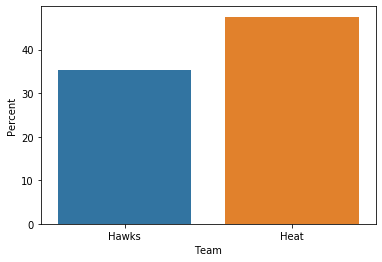

In [8]:
print('***** Overall Prediction *****')
print('------------------------------')
sns.barplot(total_predict_df['Team'],total_predict_df['Percent'])
total_predict_df.head()

***** As Opponent Prediction *****
----------------------------------


,Team,Percent
0,Hawks,75.0
1,Heat,25.0


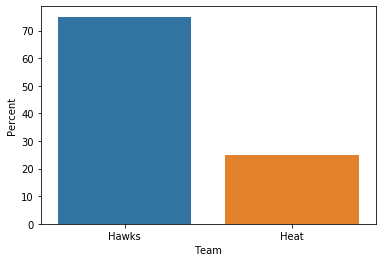

In [9]:
print('***** As Opponent Prediction *****')
print('----------------------------------')
sns.barplot(vs_predict_df['Team'],vs_predict_df['Percent'])
vs_predict_df.head()